In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline

In [4]:
train = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             5634 non-null   object 
 1   customerID        5634 non-null   object 
 2   gender            5634 non-null   object 
 3   SeniorCitizen     5634 non-null   int64  
 4   Partner           5634 non-null   object 
 5   Dependents        5634 non-null   object 
 6   tenure            5634 non-null   int64  
 7   PhoneService      5634 non-null   object 
 8   MultipleLines     5634 non-null   object 
 9   InternetService   5634 non-null   object 
 10  OnlineSecurity    5634 non-null   object 
 11  OnlineBackup      5634 non-null   object 
 12  DeviceProtection  5634 non-null   object 
 13  TechSupport       5634 non-null   object 
 14  StreamingTV       5634 non-null   object 
 15  StreamingMovies   5634 non-null   object 
 16  Contract          5634 non-null   object 


In [15]:
trace = go.Pie(labels =  ['Churn : no', 'Churn : yes'], values = train['Churn'].value_counts(),
              textfont = dict(size = 20,color = '#000000'),
              marker = dict(colors=['lightblue','gold'],
                          line = dict(color = '#000000', width = 1.5)))
fig = go.Figure(trace)
fig.show()

In [20]:
train.head()

Churn  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0    No  4223-BKEOR  Female              0      No        Yes      21   
1    No  6035-RIIOM  Female              0      No         No      54   
2   Yes  3797-VTIDR    Male              0     Yes         No       1   
3   Yes  2568-BRGYX    Male              0      No         No       4   
4    No  2775-SEFEE    Male              0      No        Yes       0   

  PhoneService     MultipleLines InternetService  ... OnlineBackup  \
0          Yes                No             DSL  ...           No   
1          Yes               Yes     Fiber optic  ...          Yes   
2           No  No phone service             DSL  ...           No   
3          Yes                No     Fiber optic  ...           No   
4          Yes               Yes             DSL  ...          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0              Yes          No          No             Yes        One year   
1               No          No         Yes             Yes        Two year   
2               No          No          No              No  Month-to-month   
3               No          No          No              No  Month-to-month   
4               No         Yes          No              No        Two year   

  PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  
0               No               Mailed check          64.85        1336.8  
1              Yes  Bank transfer (automatic)          97.20       5129.45  
2              Yes           Electronic check          23.45         23.45  
3              Yes           Electronic check          70.20        237.95  
4              Yes  Bank transfer (automatic)          61.90                

[5 rows x 21 columns]

/home/giacca/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



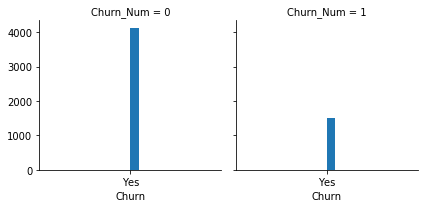

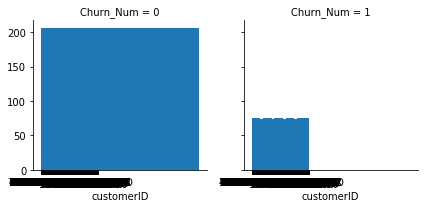

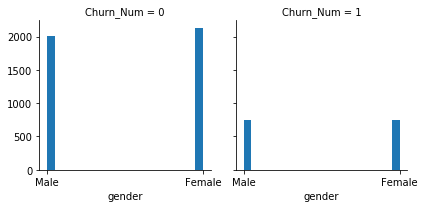

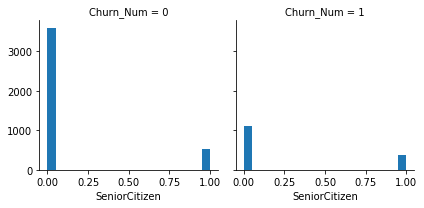

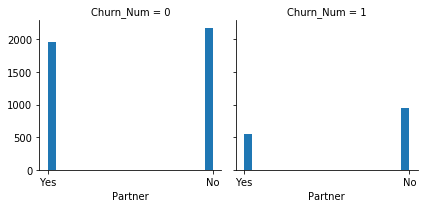

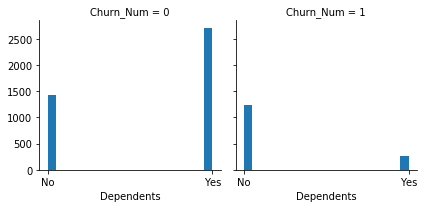

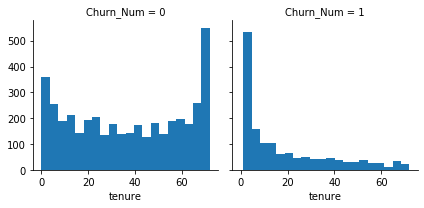

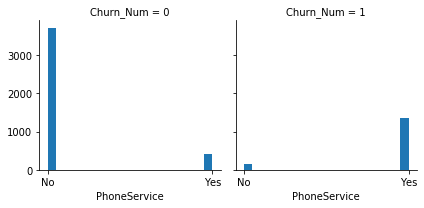

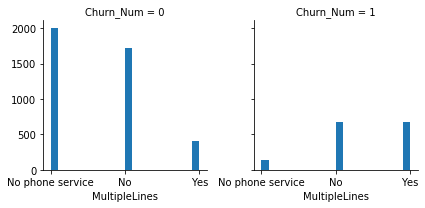

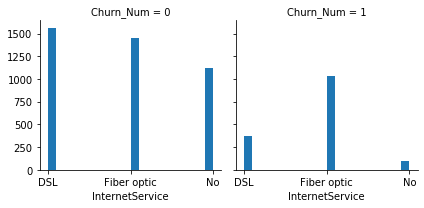

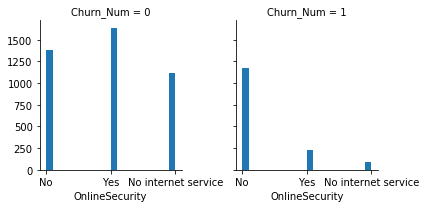

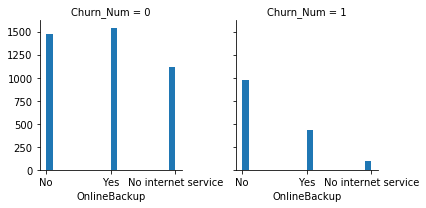

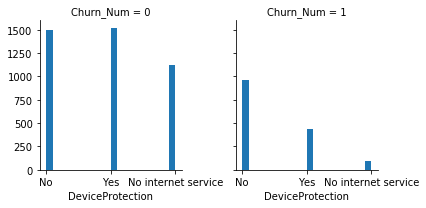

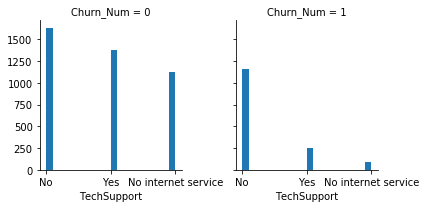

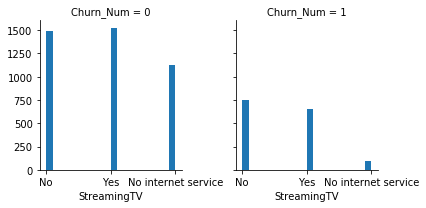

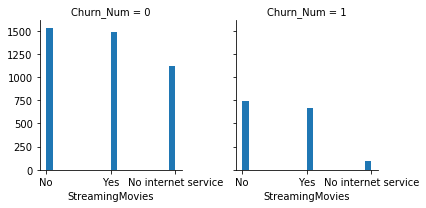

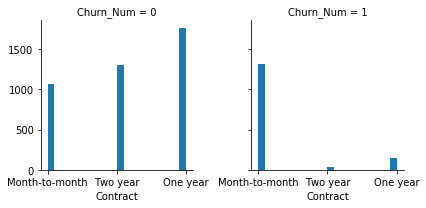

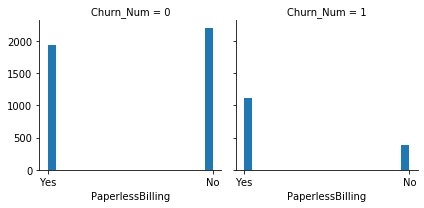

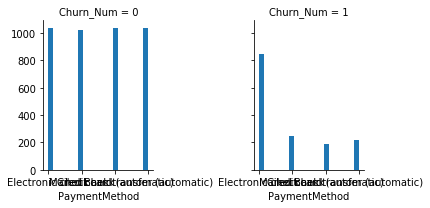

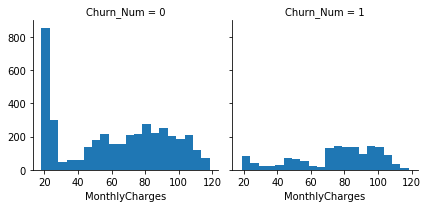

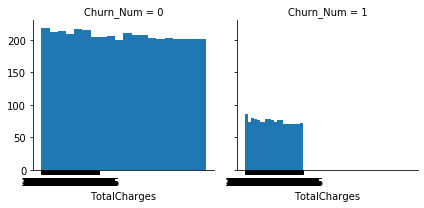

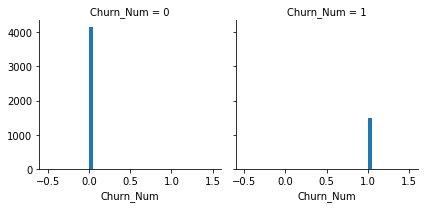

In [28]:
train['Churn_Num'] = train['Churn'].map({'Yes':1, 'No':0}).astype(int)
for c in train.columns:
    fighist = sns.FacetGrid(train, col = 'Churn_Num')
    fighist.map(plt.hist, c, bins=20)

In [30]:
missing_value_row = list(train[train['TotalCharges'] == ' '].index)
print('Valori mancanti nelle righe -->', missing_value_row, '\nIn totale -->',len(missing_value_row))

Valori mancanti nelle righe --> [4, 282, 2419, 2734, 2903, 3974, 5023, 5030, 5343, 5599] 
In totale --> 10


In [35]:
for missing_row in missing_value_row:
    train['TotalCharges'][missing_row] = 0
train['TotalCharges'] = pd.to_numeric(train['TotalCharges'])

/home/giacca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



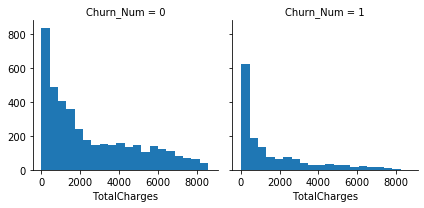

In [36]:
fighist = sns.FacetGrid(train, col = 'Churn_Num')
fighist.map(plt.hist, 'TotalCharges', bins=20)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             5634 non-null   object 
 1   customerID        5634 non-null   object 
 2   gender            5634 non-null   object 
 3   SeniorCitizen     5634 non-null   int64  
 4   Partner           5634 non-null   object 
 5   Dependents        5634 non-null   object 
 6   tenure            5634 non-null   int64  
 7   PhoneService      5634 non-null   object 
 8   MultipleLines     5634 non-null   object 
 9   InternetService   5634 non-null   object 
 10  OnlineSecurity    5634 non-null   object 
 11  OnlineBackup      5634 non-null   object 
 12  DeviceProtection  5634 non-null   object 
 13  TechSupport       5634 non-null   object 
 14  StreamingTV       5634 non-null   object 
 15  StreamingMovies   5634 non-null   object 
 16  Contract          5634 non-null   object 


In [40]:
y = train['Churn_Num'].values
codX = LabelEncoder()
for columns in train:
    train[columns] = codX.fit_transform(train[columns]) 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Churn             5634 non-null   int64
 1   customerID        5634 non-null   int64
 2   gender            5634 non-null   int64
 3   SeniorCitizen     5634 non-null   int64
 4   Partner           5634 non-null   int64
 5   Dependents        5634 non-null   int64
 6   tenure            5634 non-null   int64
 7   PhoneService      5634 non-null   int64
 8   MultipleLines     5634 non-null   int64
 9   InternetService   5634 non-null   int64
 10  OnlineSecurity    5634 non-null   int64
 11  OnlineBackup      5634 non-null   int64
 12  DeviceProtection  5634 non-null   int64
 13  TechSupport       5634 non-null   int64
 14  StreamingTV       5634 non-null   int64
 15  StreamingMovies   5634 non-null   int64
 16  Contract          5634 non-null   int64
 17  PaperlessBilling  5634 non-null  

In [74]:
#elimino le features che non mi danno informazioni
X = train.drop(['Churn','Churn_Num','customerID',"TotalCharges","gender"],axis=1).values
X.shape

(5634, 17)

In [75]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [76]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 1000, C=100)
clf.fit(X_train,y_train)
print("Accuracy: {}%".format(round(clf.score(X_test,y_test)*100,2)))

Accuracy: 79.89%


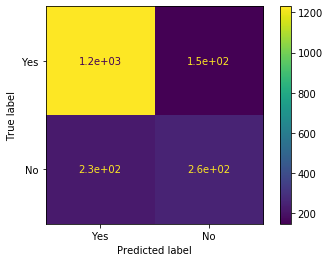

In [77]:
plot_confusion_matrix(clf, X_test, y_test, display_labels = ["Yes","No"])
plt.show()